# Pairwise Alignment and Dotplot

**Requirements**:

- Julia 1.6+
- BioAlignments v2
- BioSequences v2

Pairwise sequence alignment algorithms are provided by the `BioAlignments.jl` package.
The sequence alignment is a kind of optimization problem to find the best scoring alignment.
For example, matching two similar symbols gets a high (often positive) score
and matching dissimilar symbols does a low (often negative) score.

In [1]:
using BioSequences
using BioAlignments

The following two sequences are homologus protein sequences from [titin](https://en.wikipedia.org/wiki/Titin)
of human and mouse.
Titin is a component of muscle fiber and extremely long (~30,000 amino acids)
compared to other protein sequences.
So, the sequences used here are just part of them.
The complete sequences can be found here:

- TITIN_HUMAN: <http://www.uniprot.org/uniprot/Q8WZ42>
- TITIN_MOUSE: <http://www.uniprot.org/uniprot/A2ASS6>

In [2]:
titin_human = aa"""
EYTLLLIEAFPEDAAVYTCEAKNDYGVATTSASLSVEVPEVVSPDQEMPVYPPAIITPLQDTVTSEGQPA
RFQCRVSGTDLKVSWYSKDKKIKPSRFFRMTQFEDTYQLEIAEAYPEDEGTYTFVASNAVGQVSSTANLS
LEAPESILHERIEQEIEMEMKEFSSSFLSAEEEGLHSAELQLSKINETLELLSESPVYPTKFDSEKEGTG
PIFIKEVSNADISMGDVATLSVTVIGIPKPKIQWFFNGVLLTPSADYKFVFDGDDHSLIILFTKLEDEGE
YTCMASNDYGKTICSAYLKINSKGEGHKDTETESAVAKSLEKLGGPCPPHFLKELKPIRCAQGLPAIFEY
TVVGEPAPTVTWFKENKQLCTSVYYTIIHNPNGSGTFIVNDPQREDSGLYICKAENMLGESTCAAELLVL
LEDTDMTDTPCKAKSTPEAPEDFPQTPLKGPAVEALDSEQEIATFVKDTILKAALITEENQQLSYEHIAK
ANELSSQLPLGAQELQSILEQDKLTPESTREFLCINGSIHFQPLKEPSPNLQLQIVQSQKTFSKEGILMP
EEPETQAVLSDTEKIFPSAMSIEQINSLTVEPLKTLLAEPEGNYPQSSIEPPMHSYLTSVAEEVLSPKEK
TVSDTNREQRVTLQKQEAQSALILSQSLAEGHVESLQSPDVMISQVNYEPLVPSEHSCTEGGKILIESAN
PLENAGQDSAVRIEEGKSLRFPLALEEKQVLLKEEHSDNVVMPPDQIIESKREPVAIKKVQEVQGRDLLS
KESLLSGIPEEQRLNLKIQICRALQAAVA
"""

799aa Amino Acid Sequence:
EYTLLLIEAFPEDAAVYTCEAKNDYGVATTSASLSVEVP…QEVQGRDLLSKESLLSGIPEEQRLNLKIQICRALQAAVA

In [3]:
titin_mouse = aa"""
EYTLLLIEAFPEDAAVYTCEAKNDYGVATTSASLSVEVPEVVSPDQEMPVYPPAIVTPLQDTVTSEGRPA
RFQCQVSGTDLKVSWYCKDKKIKPSRFFRMTQFEDTYQLEIAEAYPEDEGTYAFVANNAVGQVSSTATLR
LEAPESILHERIGQQIEMEMKEIASLLSAEEDFQTYSSDLRLPNANETLELLSEPPARSTQFDSRQEGAA
PVFIREISDVEISVEDVAKLSVTVTGCPKPKIQWFFNGMLLTPSADYKFVFDGDTHSLIILFTRFQDEGE
YTCLASNEYGKAVCSAHLRISPRGERSTEMESGEKKALEKPKGPCPPYFFKELKPVHCGPGIPAVFEYSV
HGEPAPTVLWFKEDMPLYTSVCYTIIHSPDGSGTFIVNDPQRGDSGLYLCKAQNLWGESTCAAELLVLPE
DTDVPDASCKEESTLGVPGDFLETSARGPLVQGVDSRQEITAFAEGTISKAALIAEETLQLSYERSVDDS
EVGTGVTIGAQKLPPVVLSTPQGTGELPSIDGAVHTQPGRGPPPTLNLQAVQAQTTLPKEATLQFEEPEG
VFPGASSAAQVSPVTIKPLITLTAEPKGNYPQSSTAAPDHALLSSVAAETLQLGEKKIPEVDKAQRALLL
SQSLAEGCVESLEVPDVAVSNMRSEPQVPFQHTCTEGKILMASADTLKSTGQDVALRTEEGKSLSFPLAL
EEKQVLLKEEQSEVVAVPTSQTSKSEKEPEAIKGVKEVREQELLSKETLFPSMPEEQRLHLKTQVRRALQ
AAVA
"""

774aa Amino Acid Sequence:
EYTLLLIEAFPEDAAVYTCEAKNDYGVATTSASLSVEVP…KEVREQELLSKETLFPSMPEEQRLHLKTQVRRALQAAVA

The similarity score between two symbols are described by a [substitution matrix](https://en.wikipedia.org/wiki/Substitution_matrix)
and `BioAlignments.jl` provides some predefined matrices commonly seen in bioinformatics.
`BLOSUM62` is a substitution matrix for amino acids
and sometimes used as a default matrix in some programs.
The derivation method and the biological rationale are outlined in this [wikipedia article](https://en.wikipedia.org/wiki/BLOSUM).

In [4]:
BLOSUM62

SubstitutionMatrix{AminoAcid, Int64}:
     A  R  N  D  C  Q  E  G  H  I  L  K  M  F  P  S  T  W  Y  V  O  U  B  J  Z  X  *
  A  4 -1 -2 -2  0 -1 -1  0 -2 -1 -1 -1 -1 -2 -1  1  0 -3 -2  0   0̲   0̲ -2   0̲ -1  0 -4
  R -1  5  0 -2 -3  1  0 -2  0 -3 -2  2 -1 -3 -2 -1 -1 -3 -2 -3   0̲   0̲ -1   0̲  0 -1 -4
  N -2  0  6  1 -3  0  0  0  1 -3 -3  0 -2 -3 -2  1  0 -4 -2 -3   0̲   0̲  3   0̲  0 -1 -4
  D -2 -2  1  6 -3  0  2 -1 -1 -3 -4 -1 -3 -3 -1  0 -1 -4 -3 -3   0̲   0̲  4   0̲  1 -1 -4
  C  0 -3 -3 -3  9 -3 -4 -3 -3 -1 -1 -3 -1 -2 -3 -1 -1 -2 -2 -1   0̲   0̲ -3   0̲ -3 -2 -4
  Q -1  1  0  0 -3  5  2 -2  0 -3 -2  1  0 -3 -1  0 -1 -2 -1 -2   0̲   0̲  0   0̲  3 -1 -4
  E -1  0  0  2 -4  2  5 -2  0 -3 -3  1 -2 -3 -1  0 -1 -3 -2 -2   0̲   0̲  1   0̲  4 -1 -4
  G  0 -2  0 -1 -3 -2 -2  6 -2 -4 -4 -2 -3 -3 -2  0 -2 -2 -3 -3   0̲   0̲ -1   0̲ -2 -1 -4
  H -2  0  1 -1 -3  0  0 -2  8 -3 -3 -1 -2 -1 -2 -1 -2 -2  2 -3   0̲   0̲  0   0̲  0 -1 -4
  I -1 -3 -3 -3 -1 -3 -3 -4 -3  4  2 -3  1  0 -3 -2 -1 -3 

The score in the matrix can be accessed using a pair of amino acids:

In [5]:
BLOSUM62[AA_R, AA_K]

2

Two protein sequences are aligned to each other using the `pairalign` function,
which takes an alignment optimization problem (`GlobalAlignment()`),
two compared sequences (`titin_human`, `titin_mouse`) and scoring model (`model`).
The algorithms implemented in this module can find the optimal sequence alignments
between two sequences based on affine gap scoring model,
in which inserting gaps of length `k` in a sequence alignment
gets `gap_open + gap_extend * k` where `gap_open` and `gap_extend`
are non-positive scores imposed on starting a new gap and extending a gap, respectively.

In [6]:
# Create a socring model from a substitution matrix and gap scores.
model = AffineGapScoreModel(BLOSUM62, gap_open=-11, gap_extend=-1)

AffineGapScoreModel{Int64}:
  SubstitutionMatrix{AminoAcid, Int64}:
     A  R  N  D  C  Q  E  G  H  I  L  K  M  F  P  S  T  W  Y  V  O  U  B  J  Z  X  *
  A  4 -1 -2 -2  0 -1 -1  0 -2 -1 -1 -1 -1 -2 -1  1  0 -3 -2  0   0̲   0̲ -2   0̲ -1  0 -4
  R -1  5  0 -2 -3  1  0 -2  0 -3 -2  2 -1 -3 -2 -1 -1 -3 -2 -3   0̲   0̲ -1   0̲  0 -1 -4
  N -2  0  6  1 -3  0  0  0  1 -3 -3  0 -2 -3 -2  1  0 -4 -2 -3   0̲   0̲  3   0̲  0 -1 -4
  D -2 -2  1  6 -3  0  2 -1 -1 -3 -4 -1 -3 -3 -1  0 -1 -4 -3 -3   0̲   0̲  4   0̲  1 -1 -4
  C  0 -3 -3 -3  9 -3 -4 -3 -3 -1 -1 -3 -1 -2 -3 -1 -1 -2 -2 -1   0̲   0̲ -3   0̲ -3 -2 -4
  Q -1  1  0  0 -3  5  2 -2  0 -3 -2  1  0 -3 -1  0 -1 -2 -1 -2   0̲   0̲  0   0̲  3 -1 -4
  E -1  0  0  2 -4  2  5 -2  0 -3 -3  1 -2 -3 -1  0 -1 -3 -2 -2   0̲   0̲  1   0̲  4 -1 -4
  G  0 -2  0 -1 -3 -2 -2  6 -2 -4 -4 -2 -3 -3 -2  0 -2 -2 -3 -3   0̲   0̲ -1   0̲ -2 -1 -4
  H -2  0  1 -1 -3  0  0 -2  8 -3 -3 -1 -2 -1 -2 -1 -2 -2  2 -3   0̲   0̲  0   0̲  0 -1 -4
  I -1 -3 -3 -3 -1 -3 -3 -4 

In [7]:
# Solve a pairwise-alignment optimization problem.
result = pairalign(GlobalAlignment(), titin_human, titin_mouse, model)

PairwiseAlignmentResult{Int64, LongAminoAcidSeq, LongAminoAcidSeq}:
  score: 2576
  seq:   1 EYTLLLIEAFPEDAAVYTCEAKNDYGVATTSASLSVEVPEVVSPDQEMPVYPPAIITPLQ  60
           ||||||||||||||||||||||||||||||||||||||||||||||||||||||| ||||
  ref:   1 EYTLLLIEAFPEDAAVYTCEAKNDYGVATTSASLSVEVPEVVSPDQEMPVYPPAIVTPLQ  60

  seq:  61 DTVTSEGQPARFQCRVSGTDLKVSWYSKDKKIKPSRFFRMTQFEDTYQLEIAEAYPEDEG 120
           ||||||| |||||| ||||||||||| |||||||||||||||||||||||||||||||||
  ref:  61 DTVTSEGRPARFQCQVSGTDLKVSWYCKDKKIKPSRFFRMTQFEDTYQLEIAEAYPEDEG 120

  seq: 121 TYTFVASNAVGQVSSTANLSLEAPESILHERIEQEIEMEMKEFSSSFLSAEEE-GLHSAE 179
           || ||| |||||||||| | |||||||||||| | |||||||  |  |||||     |  
  ref: 121 TYAFVANNAVGQVSSTATLRLEAPESILHERIGQQIEMEMKEIAS-LLSAEEDFQTYSSD 179

  seq: 180 LQLSKINETLELLSESPVYPTKFDSEKEGTGPIFIKEVSNADISMGDVATLSVTVIGIPK 239
           | |   ||||||||| |   | |||  ||  | || | |   ||  ||| ||||| | ||
  ref: 180 LRLPNANETLELLSEPPARSTQFDSRQEGAAPVFIREISDVEISVEDVAKLSVTVTGCPK 239

  seq: 240 PKIQWFF

The achieved score of the alignment is then:

In [8]:
score(result)

2576

The global alignment demonstrated above tries to align two sequences in an end-to-end manner.
However, a researcher may be interested in local similarities between two sequences.
In such a case, a [dot plot](https://en.wikipedia.org/wiki/Dot_plot_(bioinformatics))
is a good visualization to detect local similarities.

In [9]:
using CairoMakie

"""
    dotplot(seq1, seq2, submat; windowsize=20, threshold=20)

Create a dot plot from `seq1` and `seq2` based on `submat`;
`windowsize` specifies the size of a window to accumulate similarity scores along two sequences and
`threshold` specifies the score threshold to plot a white dot in a window (when `threshold` is NaN,
it plots raw similarity scores).
"""
function dotplot(seq1, seq2, submat; windowsize=20, threshold=20)
    m = length(seq1)
    n = length(seq2)
    simscores = zeros(m - windowsize + 1, n - windowsize + 1)
    for i in 1:m-windowsize+1, j in 1:n-windowsize+1
        for k in 1:windowsize
            simscores[i,j] += submat[seq1[i+k-1],seq2[j+k-1]]
        end
    end

    fig = Figure(; resolution=(800,800))

    if isnan(threshold)
        colorscale = :viridis
        ax = Axis(fig[1,1]; title="dotplot (windowsize=$windowsize, raw similarity score)")
    else
        colorscale = :greys
        ax = Axis(fig[1,1]; title="dotplot (windowsize=$windowsize, threshold=$threshold)")
        for i in eachindex(simscores)
            simscores[i] = ifelse(simscores[i] > threshold, 1, 0)
        end
    end
    heatmap!(simscores, colorscale=colorscale)
    return fig
end

Main.##292.dotplot

We can see a raw similarity score plot by setting `threshold` to `NaN`.

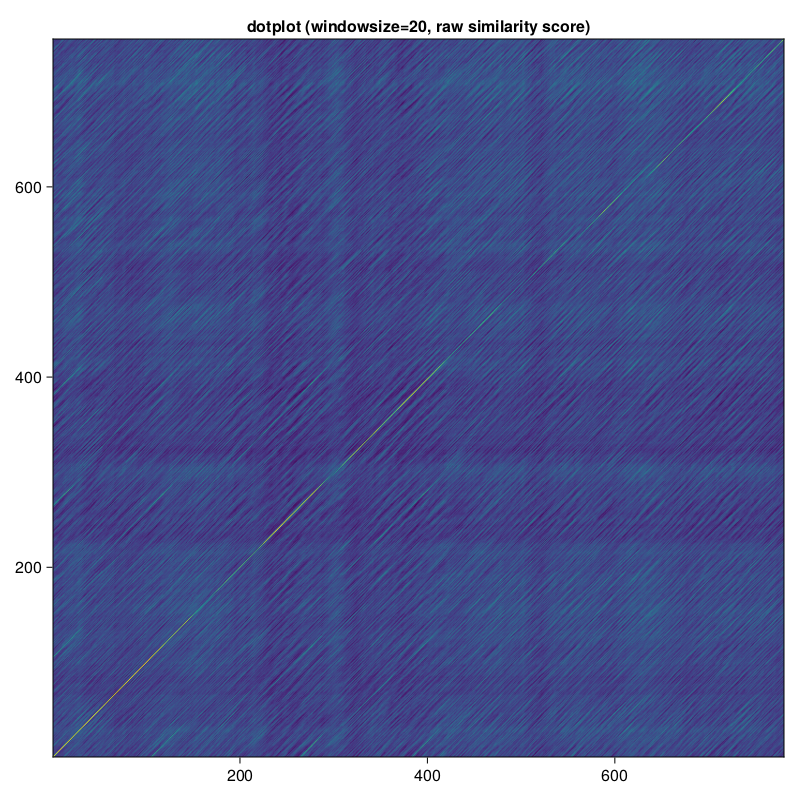

In [10]:
dotplot(titin_human, titin_mouse, BLOSUM62, threshold=NaN)

Filtering by the accumulated score highlights similar regions by white dots.
The diagonal breaking lines (from the left-down to the right-up corner)
correspond to the global similarity
between the titin sequences of human and mouse as shown above,
and other shorter lines around it
corerspond to local similarities that are not captured in the global alignment.

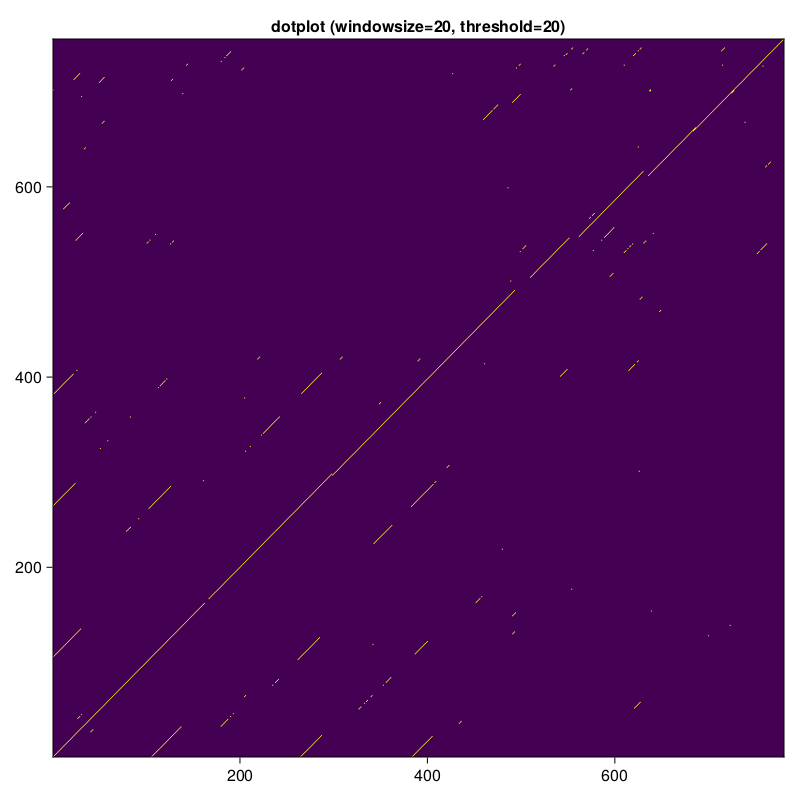

In [11]:
dotplot(titin_human, titin_mouse, BLOSUM62)

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*